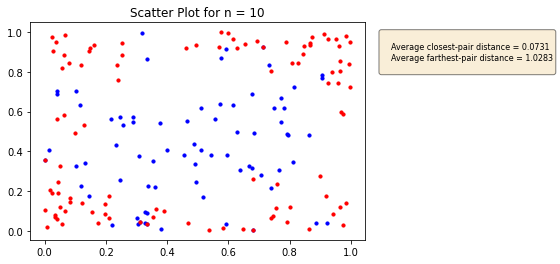

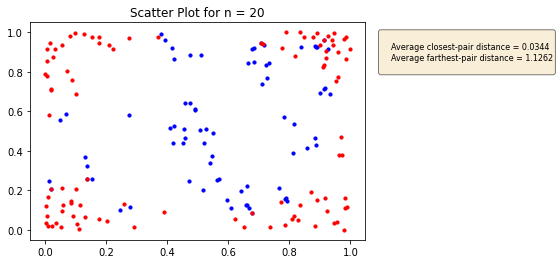

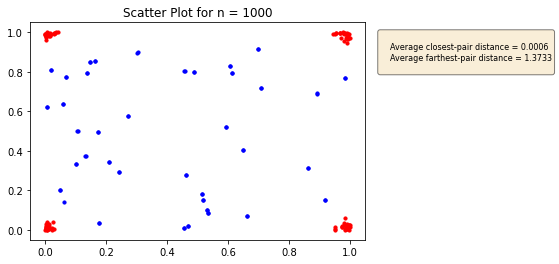

99.95500707626343


In [25]:
# Coding Challenge
# Senior Research Specialist I - 2022 cycle

# Applicant: Vitor Furtado Farias

from matplotlib import markers
import numpy as np
import math
import matplotlib.pyplot as plt
import time 
import itertools

# DEFINE FUNCTIONS OF DISTANCE
#euclidean distanec
def euclidean_dist(p1, p2):
    x1, y1 = p1
    x2, y2 = p2
    dist = math.sqrt((x1-x2) ** 2 + (y1-y2) ** 2)
    return dist

#closest pair
def find_two_closest(points_cls):
   
    distance_cls = math.sqrt(2) #largest distance

    for i1,i2 in itertools.combinations(points_cls,2):
        dist_try = euclidean_dist(i1,i2)
        if dist_try < distance_cls:
            distance_cls = dist_try
            a_cls = i1 
            b_cls = i2

    return distance_cls, a_cls, b_cls

#farthest pair
def find_two_farthest(points):

    distance_far = 0
    for j1,j2 in itertools.combinations(points,2):
        dist_try = euclidean_dist(j1,j2)
        if dist_try > distance_far:
            distance_far = dist_try
            a_far = j1 
            b_far = j2

    return distance_far, a_far, b_far

#DEFINE MAIN ALGORITHM
def solution_to_challange(n,r):

    shape = (2*r,2)
    #define lists to save values
    d_min_list = np.zeros(r)
    d_max_list = np.zeros(r)
    closest_pairs = np.zeros(shape)
    farthest_pairs = np.zeros(shape)

    for i in range(0,r):
        #print(i)
        #random draw
        points = np.random.uniform(low=[0,0], high=[1,1], size=(n,2))

        #calculations
        d_min, a_1 , b_1 = find_two_closest(points)
        d_min_list[i] = d_min
        closest_pairs[2*i] = a_1 
        closest_pairs[(2*i) + 1] = b_1
        
        d_max, a_2, b_2 = find_two_farthest(points)
        d_max_list[i] = d_max
        farthest_pairs[2*i] = a_2 
        farthest_pairs[(2*i) + 1] = b_2

    #Calculate averages
    d_min_avg = np.mean(d_min_list)
    d_max_avg = np.mean(d_max_list)

    #Plot

    plt.scatter(closest_pairs.T[0][25:],closest_pairs.T[1][25:], s=10, c='b', marker = "o")
    plt.scatter(farthest_pairs.T[0],farthest_pairs.T[1], s=10, c='r',marker = "o")

    textstr = """
    Average closest-pair distance = {min_avg}
    Average farthest-pair distance = {max_avg}
    """.format(min_avg = round(d_min_avg,4), max_avg = round(d_max_avg,4))

    props = dict(boxstyle='round', facecolor='wheat', alpha=0.5)
    plt.text(1.1, 1, textstr, fontsize=8,
        verticalalignment='top', bbox=props)
    
    plt.title("Scatter Plot for n = " + str(n))
    plt.show()


#FIRST RUN WITH n = 10 

n = 10 #number of draws per iteration
r = 50 #number of iterations

solution_to_challange(n,r)

#SECOND RUN WITH N = 20

n = 20 #number of draws per iteration
r = 50 #number of iterations

solution_to_challange(n,r)


#SECOND RUN WITH N = 1000

n = 1000 #number of draws per iteration
r = 50 #number of iterations

t = time.time()
solution_to_challange(n,r)
elapsed = time.time() - t

print(elapsed)
